In [274]:
import numpy as np
import matplotlib.pyplot as plt

In [275]:
class LinearModel(object):
    def __init__(self,theta0=None,max_itr=1000,LearningRate=8e-11,tol=1e-5):
        self.theta=theta0
        self.max_itr=max_itr
        self.lr=LearningRate
        self.tol=tol

In [276]:
class PoissonReg(LinearModel):
    def h(self,x):
        """
        args:
            x: training data plus intercept added (m,n+1)
        returns:
            ypred: prediction (m,) by using rule h(x^(i))=exp(theta.Tx^(i))
        """
        ypred=np.exp(x@self.theta) #(m,)
        return ypred
    
    def loglikelihood(self,x,y):
        '''
        returns log likelihood as sum_over_i=1tom -log yi + yi theta.T xi - exp(theta.T xi)
        '''
        yhat=self.h(x) #(m,)
        thetaTx= x@self.theta #(m,)
        vec= -np.log(y)+y*thetaTx - yhat #(m,)
        ans=vec.sum() #(m,)
        return ans
    
    def fit(self,Xin,y,method='GA'):
        '''
        args:
            Xin: training data set (m,n), m examples each having n features
            y: labels (m,)
        '''
        #intercept feature is not in data, add it
        m,n=Xin.shape
        col1=np.ones((m,1),dtype=Xin.dtype)
        x=np.hstack((col1,Xin))
        
        #initialize theta
        self.theta=np.zeros((n+1))
        
        #gradietnt ascent
        if method=='GA':
            itr=0
            while itr<self.max_itr:
                print('itr ',itr+1,f' loglikelihood: {self.loglikelihood(x,y):0.2e}')
                gradL=x.T@(y-self.h(x)) #(n+1,m)@((m,)-(m,))=(n+1,m)@(m,)=(n+1,)
                theta_new=self.theta+self.lr*gradL #(n+1,)

                #check for convergence
                if np.linalg.norm(self.lr*gradL,1)<self.tol:
                    break

                #update
                self.theta=theta_new.copy()
                itr+=1
                
        #doenot work
        elif method=='N':
            itr=0
            while itr<self.max_itr:
                print('itr ',itr+1,f' loglikelihood: {self.loglikelihood(x,y):0.2e}')
                #necessary things
                yhat=self.h(x) #(m,)
                gradL=x.T@(yhat-y) #(n+1,m)@((m,)-(m,))=(n+1,m)@(m,)=(n+1,)
                hess=(yhat*x.T)@x #(m,)*(n+1,m)=(n+1,m)@(m,n+1)=(n+1,n+1)
                Hinv=np.linalg.inv(hess)
                
                #update
                theta_new=self.theta-self.lr*Hinv@gradL
                
                #check for convergence
                if np.linalg.norm(self.lr*Hinv@gradL,1)<self.tol:
                    break

                #update
                self.theta=theta_new.copy()
                itr+=1
                
        
    def predict(self,Xin):
        '''
        args:
            Xin: test data set (m,n), m examples each having n features
        '''
        #intercept feature is not in data, add it
        m,n=Xin.shape
        col1=np.ones((m,1),dtype=Xin.dtype)
        x=np.hstack((col1,Xin))
        
        ypred=self.h(x)
        return ypred

In [277]:
def load_data(CSVpath):
    #get headers
    with open(CSVpath,'r') as csv:
        headers=csv.readline().strip().split(',')
    
    #get indices of x cols and y cols
    IndicesOfXcol=[i for i in range(len(headers)) if headers[i].startswith('x')]
    IndicesOfYcol=[i for i in range(len(headers)) if headers[i]=='y']
    
    #extract columns 
    xs=np.loadtxt(CSVpath,delimiter=',',skiprows=1,usecols=IndicesOfXcol)
    ys=np.loadtxt(CSVpath,delimiter=',',skiprows=1,usecols=IndicesOfYcol)
    
    return xs,ys
    

In [278]:
def plot(y,ypred):
    plt.figure(figsize=(12,8))
    plt.plot(y,marker='o',color='green',markersize=3,linestyle='',label='true')
    plt.plot(ypred,marker='+',color='black',markersize=5,linestyle='',label='predicted')
    plt.ylabel('no. of people visited')
    plt.xlabel('example no')
    plt.legend()
    plt.show()

In [279]:
xtrain,ytrain=load_data('data/ds4_train.csv')

In [280]:
xtrain[:5,:]

array([[1.        , 0.        , 0.99204749, 0.32574102],
       [0.        , 1.        , 0.47046345, 0.37186578],
       [0.        , 1.        , 0.49653283, 0.28985262],
       [0.        , 1.        , 0.1963769 , 0.69467223],
       [0.        , 1.        , 0.22499177, 0.88080895]])

In [281]:
xtrain.shape

(2500, 4)

In [282]:
ytrain.shape

(2500,)

In [283]:
ytrain[:5]

array([2463097.,  645481.,  474123., 1542136., 3705439.])

In [284]:
model=PoissonReg()
model.fit(xtrain,ytrain)

itr  1  loglikelihood: -3.79e+04
itr  2  loglikelihood: 1.60e+10
itr  3  loglikelihood: 3.21e+10
itr  4  loglikelihood: 4.81e+10
itr  5  loglikelihood: 6.42e+10
itr  6  loglikelihood: 8.02e+10
itr  7  loglikelihood: 9.62e+10
itr  8  loglikelihood: 1.12e+11
itr  9  loglikelihood: 1.24e+11
itr  10  loglikelihood: 1.27e+11
itr  11  loglikelihood: 1.28e+11
itr  12  loglikelihood: 1.29e+11
itr  13  loglikelihood: 1.29e+11
itr  14  loglikelihood: 1.29e+11
itr  15  loglikelihood: 1.29e+11
itr  16  loglikelihood: 1.30e+11
itr  17  loglikelihood: 1.30e+11
itr  18  loglikelihood: 1.30e+11
itr  19  loglikelihood: 1.30e+11
itr  20  loglikelihood: 1.30e+11
itr  21  loglikelihood: 1.30e+11
itr  22  loglikelihood: 1.30e+11
itr  23  loglikelihood: 1.30e+11
itr  24  loglikelihood: 1.30e+11
itr  25  loglikelihood: 1.30e+11
itr  26  loglikelihood: 1.30e+11
itr  27  loglikelihood: 1.30e+11
itr  28  loglikelihood: 1.30e+11
itr  29  loglikelihood: 1.30e+11
itr  30  loglikelihood: 1.30e+11
itr  31  loglikeli

itr  487  loglikelihood: 1.30e+11
itr  488  loglikelihood: 1.30e+11
itr  489  loglikelihood: 1.30e+11
itr  490  loglikelihood: 1.30e+11
itr  491  loglikelihood: 1.30e+11
itr  492  loglikelihood: 1.30e+11
itr  493  loglikelihood: 1.30e+11
itr  494  loglikelihood: 1.30e+11
itr  495  loglikelihood: 1.30e+11
itr  496  loglikelihood: 1.30e+11
itr  497  loglikelihood: 1.30e+11
itr  498  loglikelihood: 1.30e+11
itr  499  loglikelihood: 1.30e+11
itr  500  loglikelihood: 1.30e+11


In [285]:
model.theta

array([7.36648418, 3.93325538, 3.4332288 , 2.00011328, 4.40022962])

In [286]:
ypred=model.predict(xtrain)
ypred

array([ 2463964.54184466,   644988.65469313,   473663.75402895, ...,
        1015823.34451092, 10621986.52739146,   557637.04656538])

In [287]:
ytrain

array([ 2463097.,   645481.,   474123., ...,  1016002., 10620315.,
         558245.])

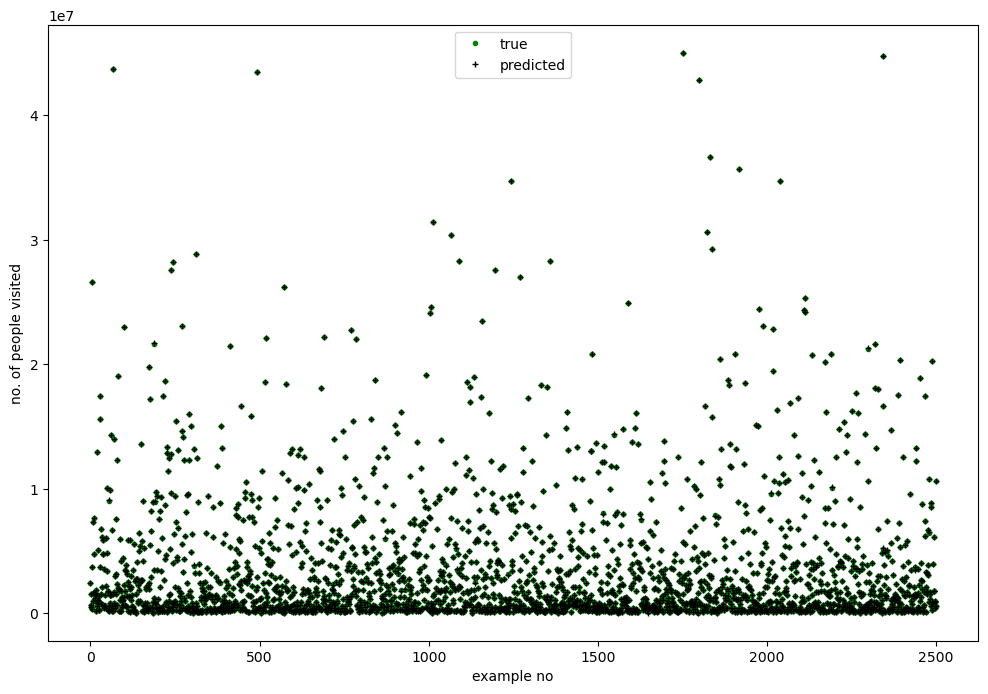

In [288]:
plot(ytrain,ypred)

In [289]:
np.sqrt(np.mean((ytrain-ypred)**2))

1860.9734754164929

In [290]:
xtest,ytest=load_data('data/ds4_valid.csv')
ytesthat=model.predict(xtest)


In [291]:
np.sqrt(np.mean((ytesthat-ytest)**2))

1942.421454833061

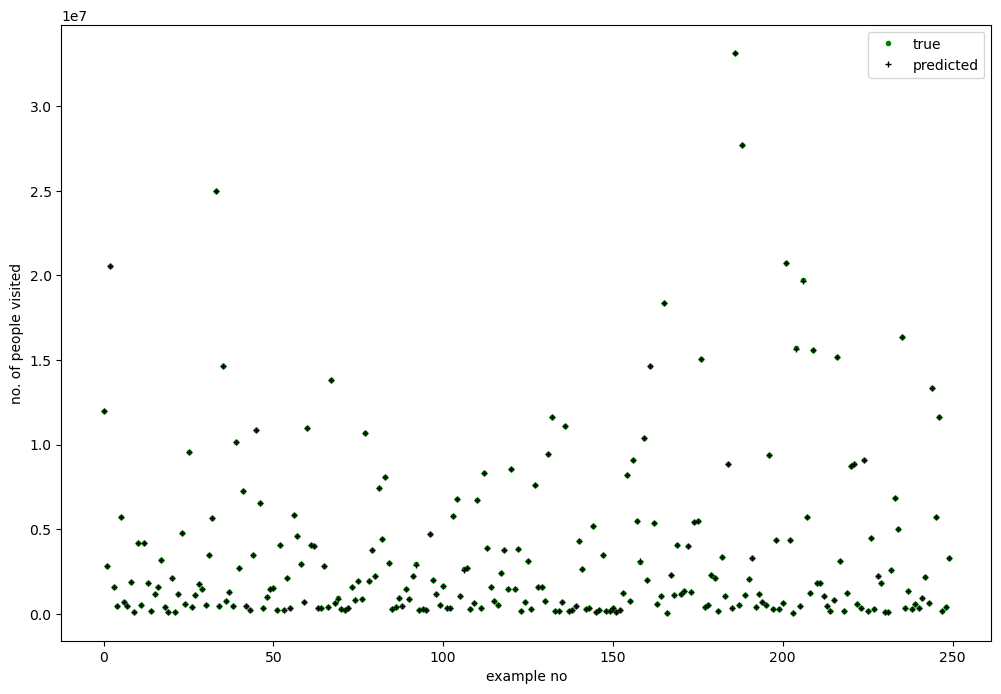

In [292]:
plot(ytest,ytesthat)

## what if we fit linear regression (gaussian error) through it

In [293]:
from sklearn.linear_model import LinearRegression


In [294]:
LR=LinearRegression()
LR.fit(xtrain,ytrain)

LinearRegression()

In [295]:
yLRpred=LR.predict(xtrain)

In [296]:
yLRpred.shape

(2500,)

In [297]:
np.sqrt(np.mean((ytrain-yLRpred)**2))

3257442.9873816627

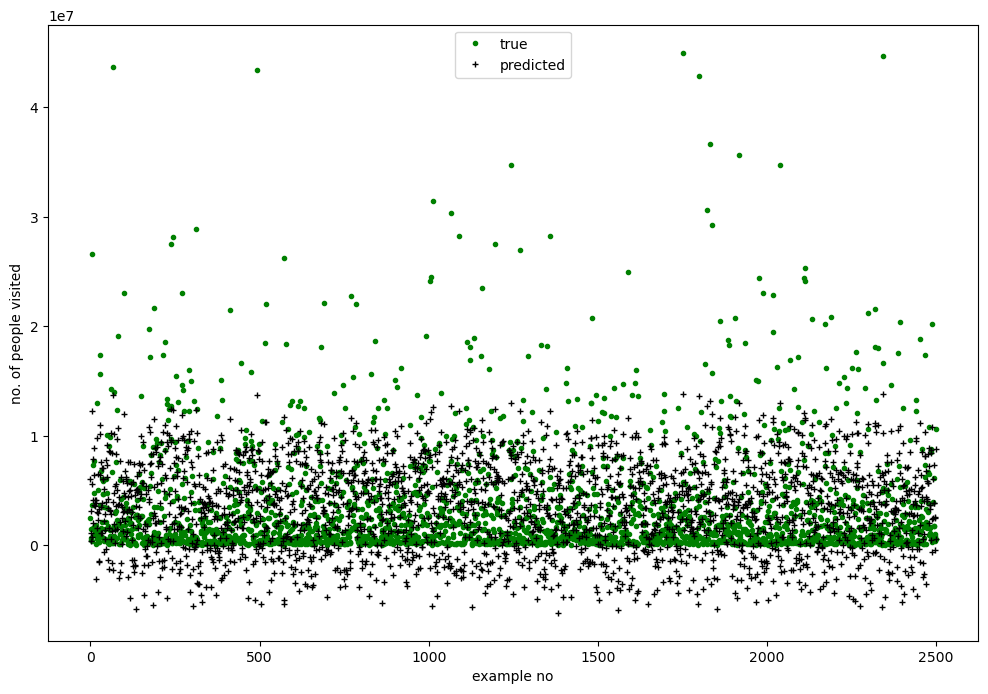

In [298]:
plot(ytrain,yLRpred)

Also predicting negative, should not happen

In [299]:
from sklearn.linear_model import PoissonRegressor

In [300]:
SKpoisson=PoissonRegressor()
SKpoisson.fit(xtrain,ytrain)

PoissonRegressor()

In [301]:
SKpoisson.n_iter_ #l-bfgs-b solver is used

43

In [302]:
ypoihat=SKpoisson.predict(xtrain)

In [303]:
ypoihat.shape

(2500,)

In [304]:
np.sqrt(np.mean((ytrain-ypoihat)**2)) #mycode=1860.97

1834.1760906329735

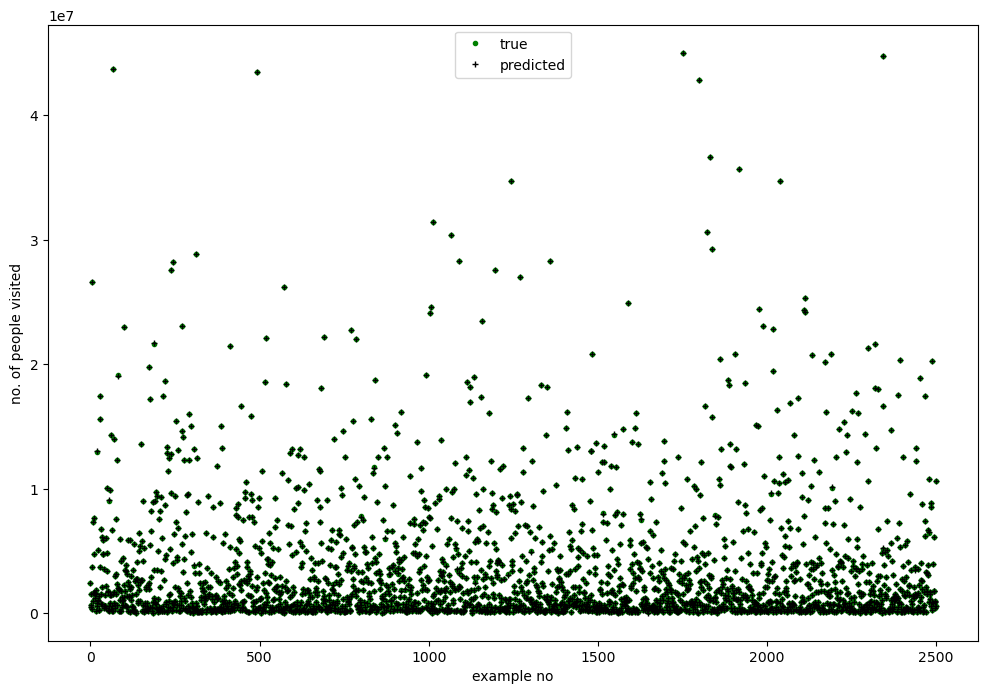

In [305]:
plot(ytrain,ypoihat) 

In [306]:
SKpoisson.coef_

array([ 0.2503587 , -0.24967066,  2.00005203,  4.39997875])

In [307]:
ytestpoisson=SKpoisson.predict(xtest)

In [308]:
np.sqrt(np.mean((ytest-ytestpoisson)**2)) #mycode 1942.421454833061

1938.5686524282917

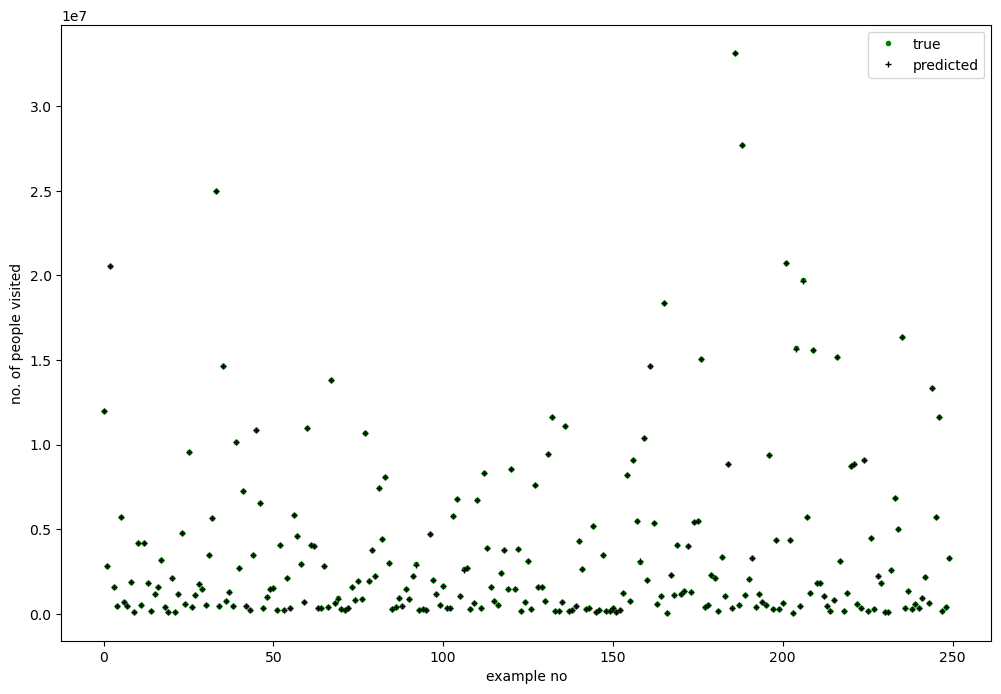

In [309]:
plot(ytest,ytestpoisson)